# <p style="text-align:center;">Tensorflow - I</p>
---
*<p style="text-align:right;">Reference: Tensorflow Official Docs</p>*


In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


> <i>TensorFlow is an end-to-end platform that makes it easy for you to build and deploy ML models. TensorFlow offers multiple levels of abstraction so you can choose the right one for your needs. Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy. If you need more flexibility, eager execution allows for immediate iteration and intuitive debugging. For large ML training tasks, use the Distribution Strategy API for distributed training on different hardware configurations without changing the model definition.

This guide provides a quick overview of TensorFlow basics. Each section of this doc is an overview of a larger topic. TensorFlow is an end-to-end platform for machine learning. It supports the following:

- Multidimensional-array based numeric computation (similar to NumPy.)
- GPU and distributed processing
- Automatic differentiation
- Model construction, training, and export
- And more

# 1. Tensors
TensorFlow operates on multidimensional arrays or tensors represented as `tf.Tensor` objects. Here is a two-dimensional tensor:

In [2]:
x = tf.constant([[1,2,3],
                [4,5,6],
                [7,8,9]])
print(x)
print("Shape of X: " , x.shape)
print("DataType of X: " , x.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
Shape of X:  (3, 3)
DataType of X:  <dtype: 'int32'>


The most important attributes of a tf.Tensor are its shape and dtype:

* `Tensor.shape`: tells you the size of the tensor along each of its axes.
* `Tensor.dtype`: tells you the type of all the elements in the tensor.

Tensorflow implements standard mathematical operations on tensors, as well as many operations specialized for ML. For ex - 

In [3]:
x + 2

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])>

In [4]:
x/2

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ],
       [3.5, 4. , 4.5]])>

The `@` symbol is used as Matrix multiplication and equal to `tf.matmul()`

In [5]:
x @ tf.transpose(x)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 14,  32,  50],
       [ 32,  77, 122],
       [ 50, 122, 194]])>

In [6]:
x_concat = tf.concat([x,x,x,x,x], axis = 1)
print("Shape of x_concat: ", x_concat.shape)

Shape of x_concat:  (3, 15)


In [7]:
x_concat

<tf.Tensor: shape=(3, 15), dtype=int32, numpy=
array([[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6],
       [7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9]])>

In [8]:
x = x/3

In [9]:
tf.nn.softmax(x, axis = -1)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.23023722, 0.32132192, 0.44844086],
       [0.23023722, 0.32132192, 0.44844086],
       [0.23023722, 0.32132192, 0.44844086]])>

The `tf.reduce_sum` computes the sum of elements across dimensions of a tensor. Reduces input tensor along the dimensions given in `axis`. Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each of the entries in axis, which must be unique. If keepdims is true, the reduced dimensions are retained with length 1.

If `axis` is None, all dimensions are reduced, and a tensor with a single element is returned.

In [10]:
print(tf.reduce_sum(x_concat))

tf.Tensor(225, shape=(), dtype=int32)


**Note: Typically, anywhere a TensorFlow function expects a Tensor as input, the function will also accept anything that can be converted to a Tensor using `tf.convert_to_tensor`. See below for an example.**

In [11]:
tf.convert_to_tensor([[36,25,89.32]])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[36.  , 25.  , 89.32]], dtype=float32)>

## 2. Variables
Normal `tf.Tensor` objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`.

In [12]:
var = tf.Variable([0.0,0.0,0.0])

In [13]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [14]:
var.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [15]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

## 3. Automatic Differentiation

Gradient descent and related algorithms are a cornerstone of modern machine learning.

To enable this, TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's error or loss with respect to its weights.

At `x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2`
### Computing Gradients

To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

### Gradient Tapes

TensorFlow provides the `tf.GradientTape` API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually `tf.Variables`. 

1. TensorFlow "records" relevant operations executed inside the `tf.GradientTape` onto a "tape". 

2. TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

The derivative of y is `y' = f'(x) = (2*x + 2) = 4`. TensorFlow can calculate this automatically:

Once you've recorded some operations, use `GradientTape.gradient`(target, sources) to calculate the gradient of some target (often a loss) relative to some source (often the model's variables):

In [16]:
x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x - 5
    return y

In [17]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [18]:
with tf.GradientTape() as tape:
    y = f(x) # define the function here for gradient

# compute gradient of y(function defined above) at point x
g_x = tape.gradient(y,x)
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

## 4. Graphs and `tf.function`

While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

* Performance optimization: to speed up training and inference.
* Export: so you can save your model when it's done training.

These require that you use `tf.function` to separate your pure-TensorFlow code from Python.

In [19]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

The first time you run the `tf.function`, although it executes in Python, it captures a complete, optimized graph representing the TensorFlow computations done within the function.

In [20]:
x = tf.constant([10,9,8])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=27>

Graphs are data structures that contain a set of `tf.Operation` objects, which represent units of computation; and `tf.Tensor` objects, which represent the units of data that flow between operations. They are defined in a `tf.Graph` context. Since these graphs are data structures, they can be saved, run, and restored all without the original Python code. 

A graph may not be reusable for inputs with a different signature (`shape` and `dtype`), so a new graph is generated instead:

In [21]:
x = tf.constant([10.0, 9.1, 8.2], dtype = tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

These captured graphs provide two benefits:

* In many cases they provide a significant speedup in execution (though not this trivial example).
* You can export these graphs, using `tf.saved_model`, to run on other systems like a server or a mobile device, no Python installation required.

## 5. Modules, Layers and Models

`tf.Module` is a class/named container for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. The `tf.Module` class is necessary to support two significant features:

1. You can save and restore the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state.
2. You can import and export the `tf.Variable` values and the `tf.function` graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.

Here is a complete example exporting a simple `tf.Module` object:

In [22]:
#inherit the tf.Module Superclass
class MyModule(tf.Module):
    def __init__(self,value):
        self.weight = tf.Variable(value)
    
    @tf.function
    def multiply(self, x):
        return x * self.weight

In [23]:
mod = MyModule(3)
mod.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

By subclassing `tf.Module` instead of object any `tf.Variable` or `tf.Module` instances assigned to object properties can be collected using the `variables`, `trainable_variables` or `submodules` property.

In [24]:
mod.variables

(<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>,)

Save the `Module`:

In [25]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved\assets


The resulting SavedModel is independent of the code that created it. You can load a SavedModel from Python, other language bindings, or TensorFlow Serving. You can also convert it to run with TensorFlow Lite or TensorFlow JS.

In [26]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

The `tf.keras.layers.Layer` and `tf.keras.Model` classes build on `tf.Module` providing additional functionality and convenience methods for building, training, and saving models. Some of these are demonstrated in the next section.

## 7. Training Loops

Now put this all together to build a basic model and train it from scratch.

First, create some example data. This generates a cloud of points that loosely follows a quadratic curve:

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [28]:
matplotlib.rcParams['figure.figsize'] = [9,6]

In [29]:
x = np.linspace(-2,2,201)
x[0:10]

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82])

The `tf.cast()` API is used to typecast a tensor object to required type. The operation supports data types (for x and dtype) of `uint8`, `uint16`, `uint32`, `uint64`, `int8`, `int16`, `int32`, `int64`, `float16`, `float32`, `float64`, `complex64`, `complex128`, `bfloat16`. In case of casting from complex types (`complex64`, `complex128`) to real types, only the real part of x is returned. In case of casting from real types to complex types (`complex64`, `complex128`), the imaginary part of the returned value is set to 0. The handling of complex types here matches the behavior of numpy.

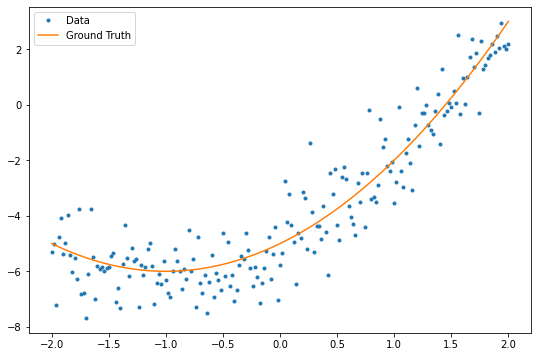

In [30]:
x = tf.cast(x, dtype = tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y
# adding noise
y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label = 'Data')
plt.plot(x, f(x), label = 'Ground Truth')
plt.legend();

 Create a quadratic model with randomly initialized weights and a bias:
 

In [31]:
class Model(tf.Module):
    
    def __init__(self):
        #randomly initialize weights and biases
        rand_init = tf.random.uniform(shape = [3], minval = 0, 
                                      maxval = 5., seed = 22)
        #initialize parameters
        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])
    
    @tf.function
    def __call__(self, x):
        #  y  =    a    *  x**2  +     b    * x +   c     
        return self.w_q * (x**2) + self.w_l * x + self.b

Watch performance before training:

In [32]:
quad_model = Model()

In [33]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label = 'Data')
    plt.plot(x, f(x), label = 'Ground Truth')
    plt.plot(x, model(x), label = 'Predictions')
    plt.title(title)
    plt.legend()

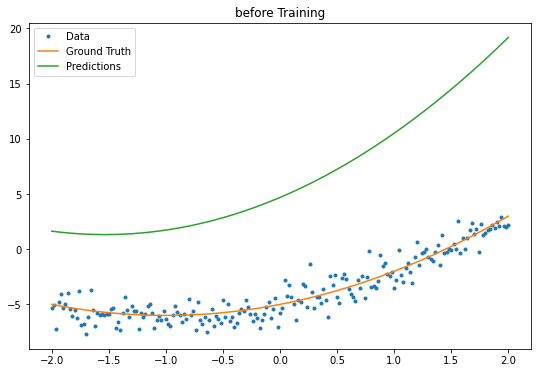

In [34]:
plot_preds(x, y, f, quad_model, 'before Training')

Defining loss for model


$$
\large M.S.E = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y_i} - y_i)}^2
$$

In [35]:
def mse_loss(y_pred,y):
    return tf.reduce_sum(tf.square(y_pred - y))

Write a basic training loop for the model. The loop will make use of the MSE loss function and its gradients with respect to the input in order to iteratively update the model's parameters. Using mini-batches for training provides both memory efficiency and faster convergence. The `tf.data.Dataset` API has useful functions for batching and shuffling.

`Dataset` usage follows a common pattern:

1. Create a source dataset from your input data.
2. Apply dataset transformations to preprocess the data.
3. Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

In [36]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x,y))

$$
Gradient \ Descent \\
Repeat\ until\ convergence:\ \\ 
\large \theta_j = \theta_j - \alpha\cdot\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_j}
$$

MSE for step 0:11064.652
MSE for step 10:184.014
MSE for step 20:184.184
MSE for step 30:184.184
MSE for step 40:184.184
MSE for step 50:184.184
MSE for step 60:184.184
MSE for step 70:184.184
MSE for step 80:184.184
MSE for step 90:184.184




Text(0.5, 1.0, 'MSE loss vs Training Epochs')

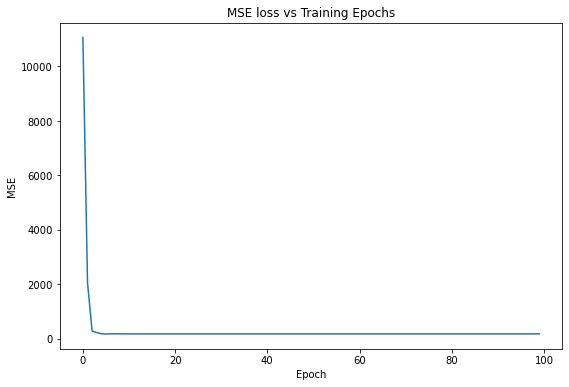

In [37]:
# set parameters for training
epochs = 100
learning_rate = 0.01
losses = []

#training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            #defining the loss function for differentiation
            batch_loss = mse_loss(quad_model(x_batch), y_batch)
        
        #parameters update
        grads = tape.gradient(batch_loss, quad_model.variables)
        for g,v in zip(grads, quad_model.variables):
            #Update v by subtracting learning_rate*grad from it.
            v.assign_sub(learning_rate*g)
        
    #keep track of loss/epoch
    loss = mse_loss(quad_model(x),y)
    losses.append(loss)
    if(epoch%10==0):
        print(f'MSE for step {epoch}:{loss.numpy():0.3f}')

#result plotting
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE loss vs Training Epochs")

Now plot the predictions after training

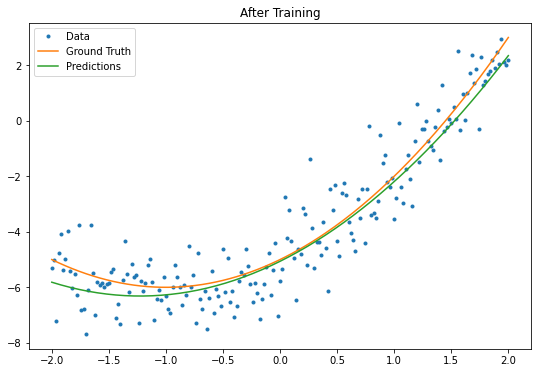

In [38]:
plot_preds(x,y,f,quad_model, 'After Training')

That's working, but remember that implementations of common training utilities are available in the `tf.keras` module. So, consider using those before writing your own. To start with, the `Model.compile` and `Model.fit` methods implement a training loop for you:

Begin by creating a Sequential Model in Keras using `tf.keras.Sequential`. One of the simplest Keras layers is the dense layer, which can be instantiated with `tf.keras.layers.Dense`. The dense layer is able to learn multidimensional linear relationships of the form $Y = WX + \vec{b}$. In order to learn non linear equation of the form $w_1x^2 + w_2x + b$, the dense layer's input should be a data matrix with x^2 and x as features. The lambda layer, `tf.keras.layers.Lambda` can be used to perform this stacking operation

In [39]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x,x**2], axis = 1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [40]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01))

history = new_model.fit(x,y,epochs = 100, batch_size = 32, verbose = 0)
new_model.save('./my_new_model')

INFO:tensorflow:Assets written to: ./my_new_model\assets


Observe your Keras model's performance after training:

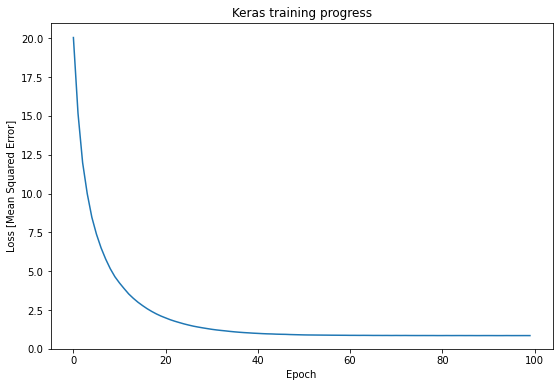

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

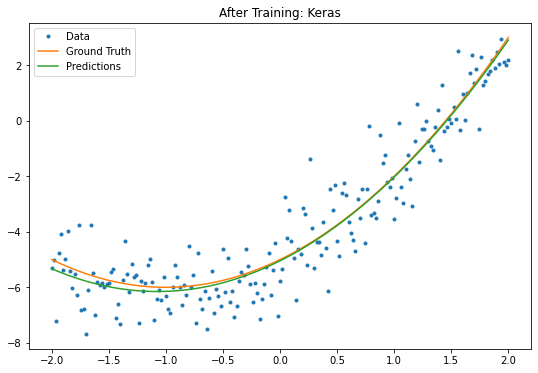

In [42]:
plot_preds(x, y, f, new_model, 'After Training: Keras')